In [1]:
import os
import pandas as pd
#os.getcwd()

'/Users/krupa'

In [2]:
#os.chdir(r"/Volumes/Krupa/MISStudy/Social-Media-Mining/practical-analysis/senti_analysis/")

In [3]:
#os.getcwd()

'/Volumes/Krupa/MISStudy/Social-Media-Mining/practical-analysis/senti_analysis'

In [4]:
#ls

Demacrates.csv               merged.csv
Democrats_Jan.numbers        negative.txt
Republicans.csv              positive.txt
Republicans_Nov_Jan.numbers


In [1]:
df1 = pd.read_csv("merged.csv", index_col=0, encoding="latin1")
df2 = pd.read_csv("FullTextDemacrates.csv", index_col=0, encoding="latin1")
df3 = pd.read_csv("FullTextRepublicans.csv", index_col=0, encoding="latin1")


NameError: name 'pd' is not defined

In [153]:
df = pd.concat([df1,df2,df3])

In [154]:
df.head()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text
0,9.649570e+17,GOPLeader,43148.8,149,NaN,53,Its not our differences that make us stronger...
1,9.646840e+17,GOPLeader,43148.1,384,NaN,121,"Paychecks are going UP, taxes are going DOWN, ..."
2,9.646460e+17,GOPLeader,43148,0,NaN,18,RT @townhallcom: Bipartisan Group of Lawmakers...
3,9.643210e+17,GOPLeader,43147.1,203,NaN,69,This type of politicization of the intelligenc...
4,9.642830e+17,GOPLeader,43147,107,NaN,29,Thanks to everyone who joined us last night in...


In [155]:
nrc = pd.read_csv("NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt", sep="\t", names=["word", "emotion", "association"], skiprows=45)

In [156]:
nrc = nrc[nrc["association"] == 1]

In [157]:
nrc = nrc[nrc['emotion'].isin(['positive', 'negative']) == False]
nrc.head(25)

,word,emotion,association
19,abacus,trust,1
23,abandon,fear,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1
47,abandonment,sadness,1
48,abandonment,surprise,1


In [158]:
from nltk.tokenize import TweetTokenizer

In [159]:
tt = TweetTokenizer()

In [160]:
tweet = df.iloc[1000 , :]
print(tweet[6])

RT @FoxBusiness: .@RandPaul on Section 702 of FISA: We're asking for two things: This big, massive amount of data that has innocent America


In [161]:
from nltk.tokenize import TweetTokenizer

In [162]:
tt = TweetTokenizer()

In [163]:
tokenized = tt.tokenize(tweet[6])
print(tokenized)

['RT', '@FoxBusiness', ':', '.', '@RandPaul', 'on', 'Section', '702', 'of', 'FISA', ':', "We're", 'asking', 'for', 'two', 'things', ':', 'This', 'big', ',', 'massive', 'amount', 'of', 'data', 'that', 'has', 'innocent', 'America']


In [164]:
tokenized = [x.lower() for x in tokenized]
print(tokenized)

['rt', '@foxbusiness', ':', '.', '@randpaul', 'on', 'section', '702', 'of', 'fisa', ':', "we're", 'asking', 'for', 'two', 'things', ':', 'this', 'big', ',', 'massive', 'amount', 'of', 'data', 'that', 'has', 'innocent', 'america']


In [165]:
emotions = list(set(nrc['emotion']))
print(emotions)

['surprise', 'sadness', 'anger', 'joy', 'trust', 'fear', 'anticipation', 'disgust']


In [166]:
index2emotion = {}
emotion2index = {}

for i in range(len(emotions)):
    index2emotion[i] = emotions[i]
    emotion2index[emotions[i]] = i

In [167]:
print(emotions)

['surprise', 'sadness', 'anger', 'joy', 'trust', 'fear', 'anticipation', 'disgust']


In [168]:
cv = [0] * len(emotions)
print(cv)

[0, 0, 0, 0, 0, 0, 0, 0]


In [169]:
for token in tokenized:
    # Subset NRC to contain ONLY the rows associated with *this* word
    sub = nrc[nrc['word'] == token]
    # Isolate the column emotion from sub; these are the emotions associated with this word
    token_emotions = sub['emotion']
    for e in token_emotions:
        # e represents one of the emotions associated with this token
        # What is the position index associated with this emotion?
        position_index = emotion2index[e]
        # Increment the variable cv at *this* position index by 1
        cv[position_index] += 1

In [170]:
cv

[0, 0, 0, 0, 1, 0, 0, 0]

In [171]:
# Repeating this code, this has to be run for the function to work
emotions = list(set(nrc['emotion']))
index2emotion = {}
emotion2index = {}
for i in range(len(emotions)):
    index2emotion[i] = emotions[i]
    emotion2index[emotions[i]] = i
    
# Here is the function
# Assumes that a TweetTokenizer called tt has been made
# and that the NRC lexicon has been imported as nrc
def makeEmoVector(tweettext):
    cv = [0] * len(emotions)
    tokenized = tt.tokenize(tweettext)
    tokenized = [x.lower() for x in tokenized]
    for token in tokenized:
        sub = nrc[nrc['word'] == token]
        token_emotions = sub['emotion']
        for e in token_emotions:
            position_index = emotion2index[e]
            cv[position_index] += 1
    return cv

In [172]:
emotion_vectors = []
for text in df['Text']:
    emotion_vector = makeEmoVector(text)
    emotion_vectors.append(emotion_vector)

In [173]:
ev = pd.DataFrame(emotion_vectors, index=df.index, columns=emotions)
ev.head()

,surprise,sadness,anger,joy,trust,fear,anticipation,disgust
0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,1,2,1,0,0
4,1,0,0,1,0,0,1,0


In [174]:
df = df.join(ev)
df.head()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text,surprise,sadness,anger,joy,trust,fear,anticipation,disgust
0,9.649570e+17,GOPLeader,43148.8,149,NaN,53,Its not our differences that make us stronger...,0,0,0,0,2,0,0,0
0,9.649570e+17,GOPLeader,43148.8,149,NaN,53,Its not our differences that make us stronger...,0,0,0,0,1,0,1,0
0,9.649570e+17,GOPLeader,43148.8,149,NaN,53,Its not our differences that make us stronger...,0,0,0,0,2,0,0,0
0,9.645993e+17,SenSchumer,2018-02-16 20:36:14,2221,NaN,673,The indictments are also a reminder that Russi...,0,0,0,0,2,0,0,0
0,9.645993e+17,SenSchumer,2018-02-16 20:36:14,2221,NaN,673,The indictments are also a reminder that Russi...,0,0,0,0,1,0,1,0


In [175]:
cand_group = df.groupby("Name")

In [176]:
emo_counts = cand_group[emotions].agg("sum")
emo_counts

,surprise,sadness,anger,joy,trust,fear,anticipation,disgust
Name,,,,,,,,
Clyburn,9,19,6,34,42,10,21,2
GOPLeader,1128,1080,972,1932,4002,1552,2322,632
NancyPelosi,135,184,169,250,552,227,326,89
PRyan,120,206,86,214,318,98,238,42
PattyMurray,365,396,320,563,1074,522,684,198
RandPaul,282,288,256,274,672,436,418,162
RepLukeMesser,102,118,82,172,420,142,290,54
SenSchumer,276,256,247,360,816,351,451,153
SenWarren,46,57,50,83,182,63,96,34


In [309]:
count1 = 0
name1 = df[df['Name'] == "GOPLeader"]
for text in name1['Text']:
    count1 += len(tt.tokenize(text))
print(count1)

97122


In [310]:
count2 = 0
name2 = df[df['Name'] == "WhiteHouse"]
for text in name2['Text']:
    count2 += len(tt.tokenize(text))
print(count2)

count3 = 0
name3 = df[df['Name'] == "Clyburn"]
for text in name3['Text']:
    count3 += len(tt.tokenize(text))
print(count3)

count4 = 0
name4 = df[df['Name'] == "NancyPelosi"]
for text in name4['Text']:
    count4 += len(tt.tokenize(text))
print(count4)

count5 = 0
name5 = df[df['Name'] == "PRyan"]
for text in name5['Text']:
    count5 += len(tt.tokenize(text))
print(count5)

count6 = 0
name6 = df[df['Name'] == "PattyMurray"]
for text in name6['Text']:
    count6 += len(tt.tokenize(text))
print(count6)

count7 = 0
name7 = df[df['Name'] == "RandPaul"]
for text in name7['Text']:
    count7 += len(tt.tokenize(text))
print(count7)

count8 = 0
name8 = df[df['Name'] == "RepLukeMesser"]
for text in name8['Text']:
    count8 += len(tt.tokenize(text))
print(count8)

count9 = 0
name9 = df[df['Name'] == "SenSchumer"]
for text in name9['Text']:
    count9 += len(tt.tokenize(text))
print(count9)

count10 = 0
name10 = df[df['Name'] == "SenWarren"]
for text in name10['Text']:
    count10 += len(tt.tokenize(text))
print(count10)

count11 = 0
name11 = df[df['Name'] == "SenatorDurbin"]
for text in name11['Text']:
    count11 += len(tt.tokenize(text))
print(count11)

count12 = 0
name12 = df[df['Name'] == "SteveScalise"]
for text in name12['Text']:
    count10 += len(tt.tokenize(text))
print(count10)

count13 = 0
name13 = df[df['Name'] == "VP"]
for text in name13['Text']:
    count13 += len(tt.tokenize(text))
print(count13)

count14 = 0
name14 = df[df['Name'] == "WhipHoyer"]
for text in name14['Text']:
    count14 += len(tt.tokenize(text))
print(count14)

count15 = 0
name15 = df[df['Name'] == "realDonaldTrump"]
for text in name15['Text']:
    count15 += len(tt.tokenize(text))
print(count15)

count16 = 0
name16 = df[df['Name'] == "senorrinhatch"]
for text in name16['Text']:
    count16 += len(tt.tokenize(text))
print(count16)



36596
1413
15375
7914
29772
19050
8856
20580
6531
13791
30731
26972
20721
32148
50022


In [311]:
emo_counts_normalized = emo_counts.divide([count1, count2, count3, count4, count5, count6, count7, count8, count9, count10, count11, count12, count13, count14, count15, count16], axis="rows")
emo_counts_normalized

,surprise,sadness,anger,joy,trust,fear,anticipation,disgust
Name,,,,,,,,
Clyburn,0.000093,0.000196,0.000062,0.000350,0.000432,0.000103,0.000216,0.000021
GOPLeader,0.030823,0.029511,0.026560,0.052793,0.109356,0.042409,0.063450,0.017270
NancyPelosi,0.095541,0.130219,0.119604,0.176929,0.390658,0.160651,0.230715,0.062987
PRyan,0.007805,0.013398,0.005593,0.013919,0.020683,0.006374,0.015480,0.002732
PattyMurray,0.046121,0.050038,0.040435,0.071140,0.135709,0.065959,0.086429,0.025019
RandPaul,0.009472,0.009674,0.008599,0.009203,0.022572,0.014645,0.014040,0.005441
RepLukeMesser,0.005354,0.006194,0.004304,0.009029,0.022047,0.007454,0.015223,0.002835
SenSchumer,0.031165,0.028907,0.027891,0.040650,0.092141,0.039634,0.050926,0.017276
SenWarren,0.002235,0.002770,0.002430,0.004033,0.008844,0.003061,0.004665,0.001652


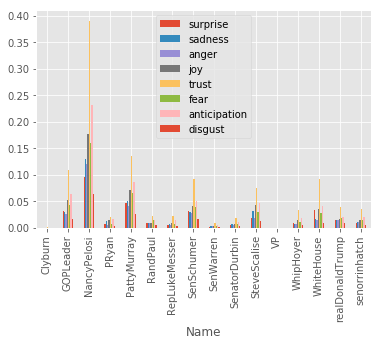

In [312]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
emo_counts_normalized.plot.bar()

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


gnb = GaussianNB()
cv = CountVectorizer()




In [304]:
cv = CountVectorizer()
X = cv.fit_transform(df2['Text'])

y = df2['Name']



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X.toarray(), y, scoring="accuracy", cv=10)

import numpy as np
print("Average accuracy, 6-fold cross validation:")
print(np.mean(scores))


Average accuracy, 6-fold cross validation:
0.46879510907


In [305]:
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
import numpy as np
mnb = MultinomialNB()

y = df2['Name']

scores = cross_val_score(mnb, X, y, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.518409015225


In [199]:
from sklearn.preprocessing import binarize

X = binarize(X)

In [306]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

y = df2['Name']

scores = cross_val_score(bnb, X, y, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.427763386314


In [254]:
import pandas as pd

df1 = pd.read_csv("merged.csv", index_col=0, encoding="latin1")
df2 = pd.read_csv("Demacrates.csv", index_col=0, encoding="latin1")
df3 = pd.read_csv("Republicans.csv", index_col=0, encoding="latin1")

data = pd.concat([df1,df2,df3])

In [255]:
data.head()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text
0,9.649570e+17,GOPLeader,43148.8,149,NaN,53,Its not our differences that make us stronger...
1,9.646840e+17,GOPLeader,43148.1,384,NaN,121,"Paychecks are going UP, taxes are going DOWN, ..."
2,9.646460e+17,GOPLeader,43148,0,NaN,18,RT @townhallcom: Bipartisan Group of Lawmakers...
3,9.643210e+17,GOPLeader,43147.1,203,NaN,69,This type of politicization of the intelligenc...
4,9.642830e+17,GOPLeader,43147,107,NaN,29,Thanks to everyone who joined us last night in...


In [256]:
data.GEO = data.GEO.fillna('')

In [257]:
data.head()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text
0,9.649570e+17,GOPLeader,43148.8,149,,53,Its not our differences that make us stronger...
1,9.646840e+17,GOPLeader,43148.1,384,,121,"Paychecks are going UP, taxes are going DOWN, ..."
2,9.646460e+17,GOPLeader,43148,0,,18,RT @townhallcom: Bipartisan Group of Lawmakers...
3,9.643210e+17,GOPLeader,43147.1,203,,69,This type of politicization of the intelligenc...
4,9.642830e+17,GOPLeader,43147,107,,29,Thanks to everyone who joined us last night in...


In [258]:
data.dropna()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text
0,9.649570e+17,GOPLeader,43148.8,149,,53,Its not our differences that make us stronger...
1,9.646840e+17,GOPLeader,43148.1,384,,121,"Paychecks are going UP, taxes are going DOWN, ..."
2,9.646460e+17,GOPLeader,43148,0,,18,RT @townhallcom: Bipartisan Group of Lawmakers...
3,9.643210e+17,GOPLeader,43147.1,203,,69,This type of politicization of the intelligenc...
4,9.642830e+17,GOPLeader,43147,107,,29,Thanks to everyone who joined us last night in...
5,9.639270e+17,GOPLeader,43146,451,,93,The heart of our nation breaks with the sensel...
6,9.638670e+17,GOPLeader,43145.8,0,,13,"RT @RepDougCollins: ""The internet is moving fa..."
7,9.635960e+17,GOPLeader,43145.1,471,,190,"LOWER TAXES, BIG RESULTS:\r\n? 4M Americans ha..."
8,9.635590e+17,GOPLeader,43145,182,,69,This plan recognizes what everyone in America ...
9,9.635400e+17,GOPLeader,43144.9,197,,66,Our military has been underfunded for too long...


In [259]:
lowerData = data['Text'].str.lower()


In [260]:
data.head()

,ID,Name,Created At,Fav Count,GEO,Re Count,Text
0,9.649570e+17,GOPLeader,43148.8,149,,53,Its not our differences that make us stronger...
1,9.646840e+17,GOPLeader,43148.1,384,,121,"Paychecks are going UP, taxes are going DOWN, ..."
2,9.646460e+17,GOPLeader,43148,0,,18,RT @townhallcom: Bipartisan Group of Lawmakers...
3,9.643210e+17,GOPLeader,43147.1,203,,69,This type of politicization of the intelligenc...
4,9.642830e+17,GOPLeader,43147,107,,29,Thanks to everyone who joined us last night in...


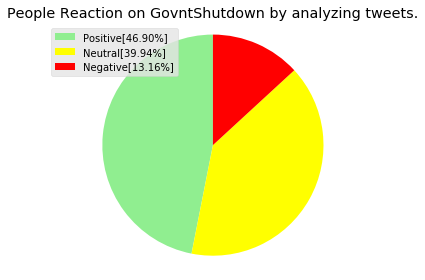

In [313]:
from textblob import TextBlob

def percentage(part, whole):
    return 100 * float(part)/float(whole)


positive = 0 
negative = 0 
neutral = 0
polarity = 0

for text in lowerData:
#     print(text)
    analysis = TextBlob(text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1
        
positive = percentage(positive,7205)
negative = percentage(negative, 7205)
neutral = percentage(neutral, 7205)
polarity = percentage(polarity,7205)

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')


    

labels = ['Positive['+str(positive)+'%]', 'Neutral['+str(neutral)+'%]' , 'Negative['+str(negative)+'%]' ]
sizes = [positive, neutral, negative]
colors = ['lightgreen', 'yellow' ,'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('People Reaction on GovntShutdown by analyzing tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()